In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
co2 = pd.read_csv("C:/Users/HP/Downloads/CO2_emission.csv")
co2.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [4]:
# which vehicles have the lowest co2 emissions and highest fuel efficiency(lowest fuel consumption)
eco_vehicles = co2.sort_values(
    by=['CO2_Emissions', 'Fuel_Consumption_comb(L/100km)'],
    ascending=[True, True]
)

# Show top 10 most efficient
eco_vehicles[['Make', 'Model', 'CO2_Emissions', 'Fuel_Consumption_comb(L/100km)', 'Engine_Size']].head(10)


,Make,Model,CO2_Emissions,Fuel_Consumption_comb(L/100km),Engine_Size
454,Hyundai,IONIQ Blue,94,4.0,1.6
453,Hyundai,IONIQ,99,4.2,1.6
452,Hyundai,Elantra Hybrid Blue,103,4.4,1.6
881,Toyota,Corolla Hybrid,106,4.5,1.8
888,Toyota,Prius,106,4.5,1.8
531,Kia,Niro,110,4.6,1.6
532,Kia,Niro FE,110,4.6,1.6
889,Toyota,Prius AWD,111,4.8,1.8
869,Toyota,Camry Hybrid LE,113,4.9,2.5
442,Honda,Insight EX,115,4.9,1.5


In [7]:
#which make and models offer the best balance between engine performance and low emissions
co2['Eco_Performance_Score'] = co2['Engine_Size'] / co2['CO2_Emissions']  # Higher = better balance

best_balance = co2.sort_values('Eco_Performance_Score', ascending=False)
best_balance[['Make', 'Model', 'Engine_Size', 'CO2_Emissions', 'Eco_Performance_Score']].head(10)


,Make,Model,Engine_Size,CO2_Emissions,Eco_Performance_Score
869,Toyota,Camry Hybrid LE,2.5,113,0.022124
165,Chevrolet,Camaro SS,6.2,281,0.022064
177,Chevrolet,Corvette,6.2,290,0.021379
166,Chevrolet,Camaro SS,6.2,296,0.020946
262,Dodge,Charger Widebody (MDS),6.4,306,0.020915
252,Dodge,Challenger Widebody (MDS),6.4,306,0.020915
260,Dodge,Charger (MDS),6.4,306,0.020915
249,Dodge,Challenger (MDS),6.4,306,0.020915
870,Toyota,Camry Hybrid SE/XLE/XSE,2.5,121,0.020661
209,Chevrolet,Silverado 4WD,6.2,306,0.020261


Transmission_Type
Automated Manual    11.362903
Automatic           11.100137
Manual              10.237037
Name: Fuel_Consumption_comb(L/100km), dtype: float64


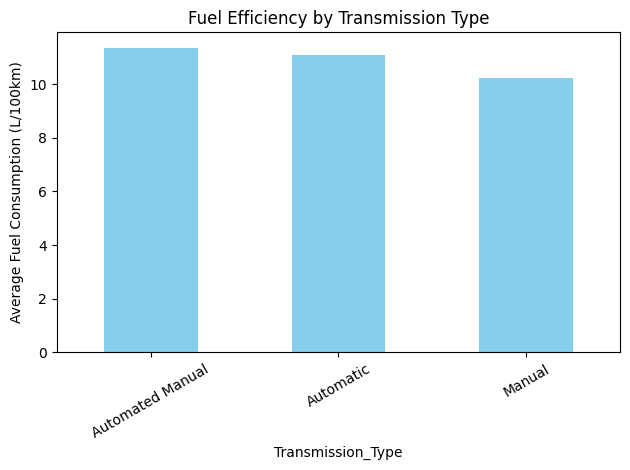

In [9]:
def classify_transmission(x):
    x = x.upper()
    if x.startswith('AM'):
        return 'Automated Manual'
    elif x.startswith('AS'):
        return 'Automatic'
    elif x.startswith('A'):
        return 'Automatic'
    elif x.startswith('M'):
        return 'Manual'
    elif x.startswith('AV'):
        return 'Continuously Variable (CVT)'
    else:
        return 'Other'

co2['Transmission_Type'] = co2['Transmission'].apply(classify_transmission)

fuel_by_trans = co2.groupby('Transmission_Type')['Fuel_Consumption_comb(L/100km)'].mean()

print(fuel_by_trans)

fuel_by_trans.plot(kind='bar', color='skyblue')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.title('Fuel Efficiency by Transmission Type')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
#Which vehicles fall below a certain CO₂ emission threshold (e.g., <150 g/km)?
low_emission_vehicles = co2[co2['CO2_Emissions'] < 150]

low_emission_vehicles[['Make', 'Model', 'CO2_Emissions', 'Fuel_Consumption_comb(L/100km)']].sort_values(
    by='CO2_Emissions'
).head(10)


,Make,Model,CO2_Emissions,Fuel_Consumption_comb(L/100km)
454,Hyundai,IONIQ Blue,94,4.0
453,Hyundai,IONIQ,99,4.2
452,Hyundai,Elantra Hybrid Blue,103,4.4
881,Toyota,Corolla Hybrid,106,4.5
888,Toyota,Prius,106,4.5
531,Kia,Niro,110,4.6
532,Kia,Niro FE,110,4.6
889,Toyota,Prius AWD,111,4.8
869,Toyota,Camry Hybrid LE,113,4.9
442,Honda,Insight EX,115,4.9


In [13]:
#What are the top 10 most eco-friendly vehicles per year?
top_eco_per_year = (
    co2.sort_values(by='CO2_Emissions')
      .groupby('Model_Year')
      .head(10)
      [['Model_Year', 'Make', 'Model', 'CO2_Emissions', 'Fuel_Consumption_comb(L/100km)']]
)

top_eco_per_year.sort_values(by='Model_Year').head(20)  # Show top 20 as preview


,Model_Year,Make,Model,CO2_Emissions,Fuel_Consumption_comb(L/100km)
454,2021,Hyundai,IONIQ Blue,94,4.0
453,2021,Hyundai,IONIQ,99,4.2
452,2021,Hyundai,Elantra Hybrid Blue,103,4.4
881,2021,Toyota,Corolla Hybrid,106,4.5
888,2021,Toyota,Prius,106,4.5
532,2021,Kia,Niro FE,110,4.6
531,2021,Kia,Niro,110,4.6
889,2021,Toyota,Prius AWD,111,4.8
869,2021,Toyota,Camry Hybrid LE,113,4.9
442,2021,Honda,Insight EX,115,4.9
